# ɪᴍᴘᴏʀᴛɪɴɢ ʟɪʙʀᴀʀɪᴇꜱ ᴀɴᴅ ᴅᴀᴛᴀꜱᴇᴛ

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
teams = pd.read_csv("/content/drive/MyDrive/Data set 1/teams.csv")

# ɪɴᴛᴇʀᴘʀᴇᴛɪɴɢ ᴅᴀᴛᴀ


In [ ]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [ ]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           2144 non-null   object 
 1   country        2144 non-null   object 
 2   year           2144 non-null   int64  
 3   events         2144 non-null   int64  
 4   athletes       2144 non-null   int64  
 5   age            2144 non-null   float64
 6   height         2144 non-null   float64
 7   weight         2144 non-null   float64
 8   medals         2144 non-null   int64  
 9   prev_medals    2014 non-null   float64
 10  prev_3_medals  2014 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 184.4+ KB


In [ ]:
teams.describe()["medals"]

count    2144.000000
mean       10.556437
std        33.028143
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       442.000000
Name: medals, dtype: float64

# ᴄʟᴇᴀɴɪɴɢ ᴅᴀᴛᴀ

In [ ]:
teams = teams[["team","country","year","athletes","age","prev_medals","medals"]]

In [ ]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [ ]:
teams = teams.dropna()

# ᴠɪꜱᴜᴀʟɪᴢɪɴɢ ᴅᴀᴛᴀ



In [ ]:
teams.corr()["medals"]

<ipython-input-9-90b4da85dcae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teams.corr()["medals"]


year          -0.034870
athletes       0.839909
age            0.023231
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

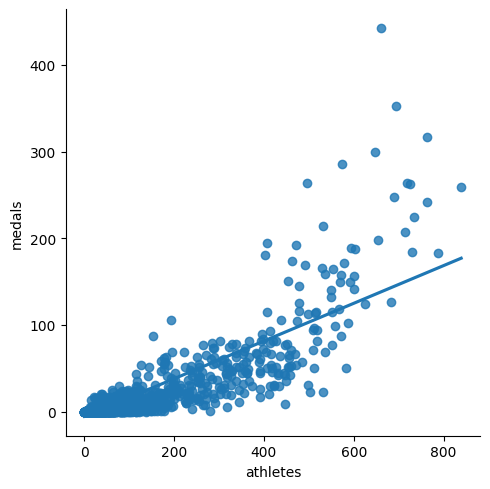

In [ ]:
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)

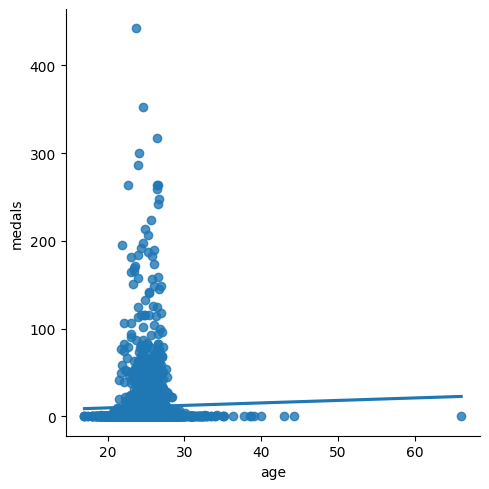

In [ ]:
sns.lmplot(x="age", y="medals", data = teams, fit_reg=True, ci=None)

# ꜱᴘʟɪᴛᴛɪɴɢ ᴅᴀᴛᴀ (ᴛᴇꜱᴛ ᴀɴᴅ ᴛʀᴀɪɴ)

In [ ]:
train = teams[teams["year"]<2012].copy()
test = teams[teams["year"]>=2012].copy()

In [ ]:
train.shape

(1609, 7)

In [ ]:
test.shape

(405, 7)

# ꜱᴘʟɪᴛᴛɪɴɢ ᴅᴀᴛᴀ (x ᴀɴᴅ ʏ)

In [ ]:
x = ["athletes","prev_medals"]
y = ["medals"]

# ꜱᴇʟᴇᴄᴛɪᴏɴ ᴏꜰ ᴍᴏᴅᴇʟ

In [ ]:
reg = LinearRegression()

In [ ]:
x = ["athletes","prev_medals"]
y = ["medals"]

In [ ]:
reg.fit(train[x],train["medals"])

LinearRegression()

# ᴛᴇꜱᴛɪɴɢ ᴅᴀᴛᴀ

In [ ]:
predictions = reg.predict(test[x])

In [ ]:
test["predictions"] = predictions

In [ ]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


# ᴘʀᴇᴅɪᴄᴛɪᴏɴꜱ

In [ ]:
test.loc[test["predictions"]< 0, "predictions"] =0

In [ ]:
test["predicyions"] = test["predictions"].round()

In [ ]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions,predicyions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.000000,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.000000,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.000000,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.000000,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629,2.0
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.000000,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.000000,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.000000,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767,2.0


# ᴀᴘᴘʟʏɪɴɢ ᴍᴇᴛʀɪᴄꜱ


In [ ]:
error =mean_absolute_error(test["medals"],test["predictions"])

In [ ]:
error

3.2971993416169867

# ᴛᴇꜱᴛɪɴɢ ᴇʀʀᴏʀ(ʙʏ ᴄᴏᴜɴᴛʀʏ)

In [ ]:
test[test["team"]=="USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions,predicyions
2053,USA,United States,2012,689,26.7,317.0,248,285.210121,285.0
2054,USA,United States,2016,719,26.4,248.0,264,235.568076,236.0


In [ ]:
test[test["team"]=="IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions,predicyions
907,IND,India,2012,95,26.0,3.0,6,6.921667,7.0
908,IND,India,2016,130,26.1,6.0,2,11.683176,12.0


In [ ]:
test[test["team"]=="CHN"]

,team,country,year,athletes,age,prev_medals,medals,predictions,predicyions
404,CHN,China,2012,479,24.0,184.0,125,170.319135,170.0
405,CHN,China,2016,499,24.0,125.0,113,127.466307,127.0


In [ ]:
error = (test["medals"] - test["predictions"]).abs()

In [ ]:
error_by_team = error.groupby(test["team"]).mean()

In [ ]:
error_by_team

team
AFG    0.500000
ALB    0.000000
ALG    1.535133
AND    0.000000
ANG    0.183782
         ...   
VIE    1.164723
VIN    0.000000
YEM    0.000000
ZAM    0.000000
ZIM    0.793257
Length: 204, dtype: float64

In [ ]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [ ]:
medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

In [ ]:
error_ratio = error_by_team / medals_by_team

In [ ]:
error_ratio

team
AFG    1.000000
ALB         NaN
ALG    1.023422
AND         NaN
ANG         inf
         ...   
VIE    1.164723
VIN         NaN
YEM         NaN
ZAM         NaN
ZIM         inf
Length: 204, dtype: float64

# ᴇʀʀᴏʀ ʀᴀᴛɪᴏ

In [ ]:
error_ratio = error_ratio[~pd.isnull(error_ratio)]

In [ ]:
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [ ]:
error_ratio

team
AFG    1.000000
ALG    1.023422
ARG    0.841636
ARM    0.433824
AUS    0.362901
         ...   
UKR    0.946412
USA    0.128207
UZB    0.658187
VEN    1.710208
VIE    1.164723
Length: 97, dtype: float64